In [1]:
from visiprog.data import *
from visiprog.drawing import *
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

Test data where we have 10 samples, and two groups overlaps at 4 and 5.

In [2]:
S = count_matrix([[0,1,2,3,4,5],[4,5,6,7,8,9]], 10)
print(S)

[[ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  2.  2.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  2.  2.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]]


Convert the similarity to distance matrix. Note that missing entries are filled in with zero

In [3]:
D, nonZeroIndex = similarity_to_distance(S, missing_value=0)

D = D/D.max()
print(D)

[[ 0.   1.   1.   1.   1.   1.   0.   0.   0.   0. ]
 [ 1.   0.   1.   1.   1.   1.   0.   0.   0.   0. ]
 [ 1.   1.   0.   1.   1.   1.   0.   0.   0.   0. ]
 [ 1.   1.   1.   0.   1.   1.   0.   0.   0.   0. ]
 [ 1.   1.   1.   1.   0.   0.5  1.   1.   1.   1. ]
 [ 1.   1.   1.   1.   0.5  0.   1.   1.   1.   1. ]
 [ 0.   0.   0.   0.   1.   1.   0.   1.   1.   1. ]
 [ 0.   0.   0.   0.   1.   1.   1.   0.   1.   1. ]
 [ 0.   0.   0.   0.   1.   1.   1.   1.   0.   1. ]
 [ 0.   0.   0.   0.   1.   1.   1.   1.   1.   0. ]]


In [4]:
X = SMACOF(D, num_iter=100, eps=1e-4)

it: 0, stress 1.77295120332
it: 0, stress 4.57313160464
it: 0, stress 1.62617198398
it: 0, stress 1.03689332989
it: 0, stress 1.71995273712
it: 0, stress 1.74549849163
it: 0, stress 2.16135893174
it: 1, stress 1.61424630048
it: 1, stress 1.08314368614
it: 1, stress 1.20736932519
it: 1, stress 1.2173577738
it: 2, stress 1.14887714599
it: 1, stress 1.48951519337
it: 2, stress 1.41962972957
it: 2, stress 1.34169627601
it: 2, stress 0.97816979096
it: 0, stress 1.72887163181
it: 1, stress 0.769609836298
it: 3, stress 1.15447806918
it: 1, stress 1.24037197046
it: 2, stress 1.19430959558
it: 3, stress 1.19568206828
it: 3, stress 1.37912709403
breaking at iteration 3 with stress 1.15447806918
it: 3, stress 0.881025260036
it: 2, stress 0.771862000272
it: 1, stress 1.10933218991
it: 2, stress 1.04812608441
it: 4, stress 1.1073262349
it: 3, stress 1.21348187897
breaking at iteration 2 with stress 0.771862000272
it: 4, stress 1.35513490347
it: 4, stress 0.797003950672
it: 3, stress 0.908680608185


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.3s


it: 39, stress 0.964959937082
it: 41, stress 0.794944750198
it: 42, stress 0.79359933677
it: 40, stress 0.965148248872
it: 43, stress 0.792279752556
it: 41, stress 0.966277371222
it: 44, stress 0.790984934565
it: 42, stress 0.968345590018
it: 43, stress 0.971320737041
it: 45, stress 0.789713537178
it: 46, stress 0.788463996978
breaking at iteration 43 with stress 0.971320737041
it: 47, stress 0.787234594368
it: 48, stress 0.78602350943
it: 49, stress 0.784828870683
it: 50, stress 0.783648796227
it: 51, stress 0.782481427395
it: 52, stress 0.781324955394
it: 53, stress 0.780177641632
it: 54, stress 0.779037832545
it: 55, stress 0.77790396974
it: 56, stress 0.776774596242
it: 57, stress 0.775648359562
it: 58, stress 0.774524012247
it: 59, stress 0.773400410441
it: 60, stress 0.772276510961
it: 61, stress 0.771151367256
it: 62, stress 0.770024124607
it: 63, stress 0.76889401481
it: 64, stress 0.767760350563
it: 65, stress 0.76662251974
it: 66, stress 0.765479979655
it: 67, stress 0.764332

[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished


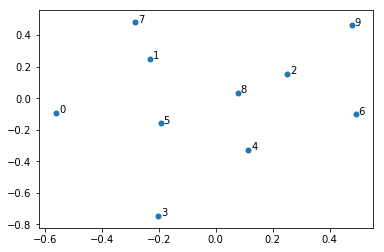

In [5]:
scatter_plot(X, "testing")

for i in range(X.shape[0]):
    plt.annotate(str(i), (X[i][0]+0.01,X[i][1]))

Note that how 4 and 5 are close to each other.